### Цель: как можно раньше предсказать, что пользователь уйдет с курса

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

## step 1.10 - подготовка данных

In [2]:
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip', compression ='zip')

In [3]:
events_data.sample(7, random_state=60)

,step_id,timestamp,action,user_id
1529267,32089,1476629504,started_attempt,6668
927558,32206,1453546361,viewed,17816
377918,32181,1436102179,viewed,3899
1553818,32927,1477216224,viewed,10391
2579916,33902,1507082014,viewed,26654
1469739,32191,1475519804,discovered,25547
1418459,32219,1474500604,viewed,17056


In [4]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480703 entries, 0 to 3480702
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   step_id    int64 
 1   timestamp  int64 
 2   action     object
 3   user_id    int64 
dtypes: int64(3), object(1)
memory usage: 106.2+ MB


In [5]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [6]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s') # unit='s' подразумевает, что timestamp в секундах

In [7]:
events_data.sample(7, random_state=60)

,step_id,timestamp,action,user_id,date
1529267,32089,1476629504,started_attempt,6668,2016-10-16 14:51:44
927558,32206,1453546361,viewed,17816,2016-01-23 10:52:41
377918,32181,1436102179,viewed,3899,2015-07-05 13:16:19
1553818,32927,1477216224,viewed,10391,2016-10-23 09:50:24
2579916,33902,1507082014,viewed,26654,2017-10-04 01:53:34
1469739,32191,1475519804,discovered,25547,2016-10-03 18:36:44
1418459,32219,1474500604,viewed,17056,2016-09-21 23:30:04


In [8]:
events_data.date.max()

Timestamp('2018-05-19 23:33:31')

In [9]:
events_data['day'] = events_data.date.dt.date # достать день

In [10]:
events_data.sample(7, random_state=60)

,step_id,timestamp,action,user_id,date,day
1529267,32089,1476629504,started_attempt,6668,2016-10-16 14:51:44,2016-10-16
927558,32206,1453546361,viewed,17816,2016-01-23 10:52:41,2016-01-23
377918,32181,1436102179,viewed,3899,2015-07-05 13:16:19,2015-07-05
1553818,32927,1477216224,viewed,10391,2016-10-23 09:50:24,2016-10-23
2579916,33902,1507082014,viewed,26654,2017-10-04 01:53:34,2017-10-04
1469739,32191,1475519804,discovered,25547,2016-10-03 18:36:44,2016-10-03
1418459,32219,1474500604,viewed,17056,2016-09-21 23:30:04,2016-09-21


In [11]:
events_data.groupby('day') \
    .user_id.nunique().sample(7, random_state=60)

day
2016-08-20     62
2017-09-16    113
2016-10-06    190
2016-12-17     71
2017-11-24    127
2018-04-17    169
2017-01-21     65
Name: user_id, dtype: int64

In [12]:
sns.set(rc={'figure.figsize': (9, 6)})

<AxesSubplot: xlabel='day'>

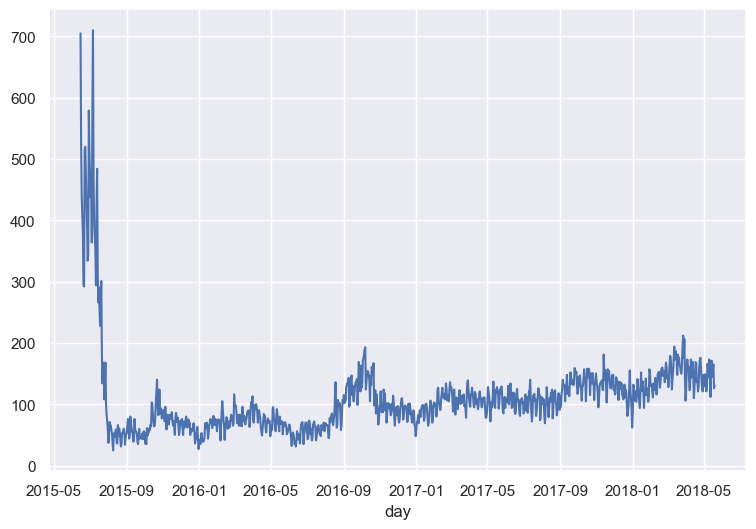

In [13]:
events_data.groupby('day') \
    .user_id.nunique().plot()

In [14]:
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id': 'count'}) \
    .rename(columns={'step_id': 'passed_steps'}).sample(7, random_state=60) # число не уникальных степов, решенных юзером

# Теряем юзеров, которые не прошли ни один степ

,user_id,passed_steps
13227,20576,2
14475,22523,1
4603,7027,51
1012,1533,85
14077,21910,45
2422,3667,1
10291,15963,142


<AxesSubplot: >

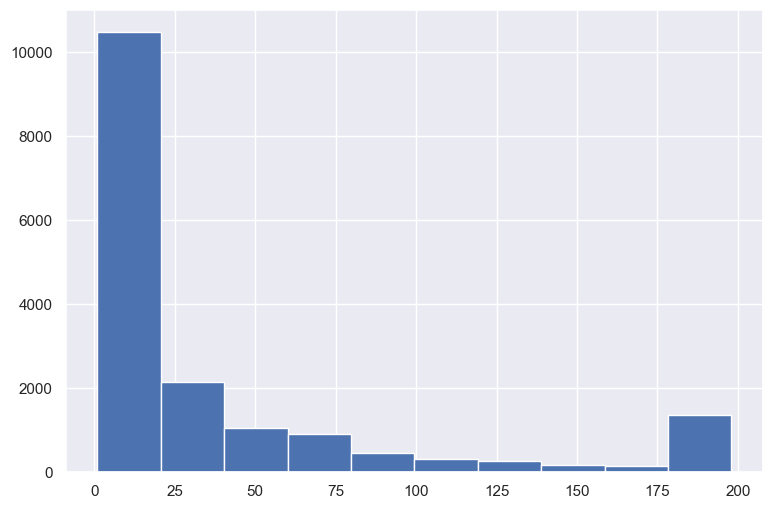

In [15]:
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id': 'count'}) \
    .rename(columns={'step_id': 'passed_steps'}).passed_steps.hist() 

In [16]:
# Правильное решение

events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index().sample(7, random_state=60)

action,user_id,discovered,passed,started_attempt,viewed
4016,5563,198,198,109,480
17793,24786,10,10,2,39
2650,3624,25,24,9,44
6845,9496,1,1,0,1
18913,26349,1,0,1,2
13462,18736,1,1,0,1
6273,8692,2,2,0,3


<AxesSubplot: >

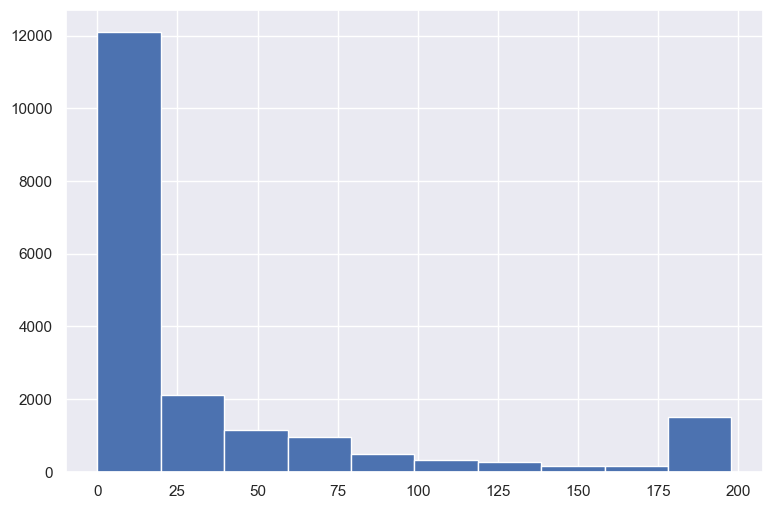

In [17]:
events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index().discovered.hist()

## step 1.11

In [18]:
submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')

In [19]:
submissions_data.sample(7, random_state=60)

,step_id,timestamp,submission_status,user_id
289746,32031,1490224661,wrong,19811
438350,120745,1518642265,correct,16121
187826,33350,1468927590,wrong,18502
294541,31988,1492003091,correct,22431
230601,31972,1475759526,wrong,2542
213704,31978,1473693028,wrong,17047
356736,33332,1504881526,wrong,9470


In [20]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s') # unit='s' подразумевает, что timestamp в секундах
submissions_data['day'] = submissions_data.date.dt.date # достать день

In [21]:
submissions_data.sample(7, random_state=60)

,step_id,timestamp,submission_status,user_id,date,day
289746,32031,1490224661,wrong,19811,2017-03-22 23:17:41,2017-03-22
438350,120745,1518642265,correct,16121,2018-02-14 21:04:25,2018-02-14
187826,33350,1468927590,wrong,18502,2016-07-19 11:26:30,2016-07-19
294541,31988,1492003091,correct,22431,2017-04-12 13:18:11,2017-04-12
230601,31972,1475759526,wrong,2542,2016-10-06 13:12:06,2016-10-06
213704,31978,1473693028,wrong,17047,2016-09-12 15:10:28,2016-09-12
356736,33332,1504881526,wrong,9470,2017-09-08 14:38:46,2017-09-08


In [22]:
submissions_data[submissions_data.submission_status == 'correct'] \
    .groupby('user_id') \
    .agg({'submission_status': 'count'}) \
    .sort_values(by='submission_status', ascending=False).head(1)

# user_id Анатолия Карпова

,submission_status
user_id,
1046,421


In [23]:
user_scores = submissions_data.pivot_table(index='user_id', 
                        columns='submission_status', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index()

In [24]:
user_scores.sample(7, random_state=60)

submission_status,user_id,correct,wrong
8598,23254,13,16
6680,17861,54,41
8681,23460,8,3
4646,12422,10,5
9575,25861,2,0
9925,26772,9,5
5155,13773,73,110


In [25]:
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).sample(7, random_state=60)

user_id
5563     [1111942, 803088, 84546, 24441921, 78535, 9150...
24786                                             [524507]
3624                          [475178, 34717997, 10426506]
9496                                                    []
26349                                                   []
18736                                                   []
8692                                                    []
Name: timestamp, dtype: object

In [26]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values
gap_data

array([array([], dtype=int32), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
                 98252,    57019])                                       ,
       array([1567990]), array([], dtype=int32)], dtype=object)

In [27]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0)) / (24 * 60 * 60)

In [28]:
gap_data

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

<AxesSubplot: >

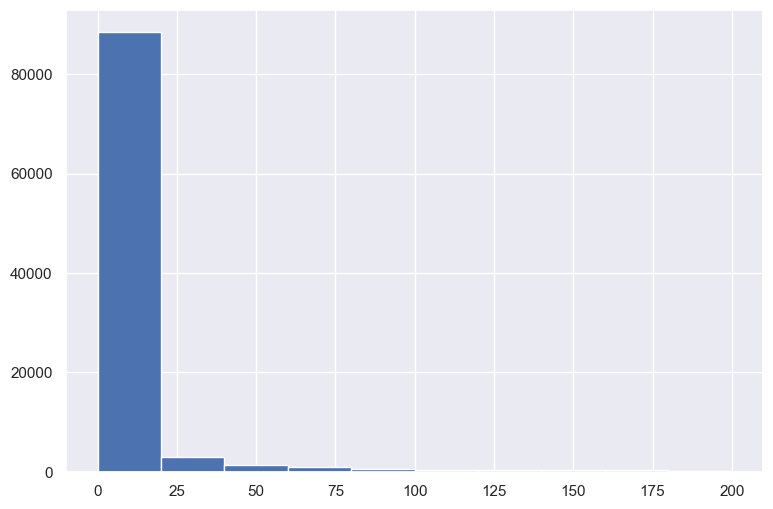

In [29]:
gap_data[gap_data < 200].hist()

In [30]:
gap_data.quantile(0.9) # 10% юзеров возвращаются после перерыва в 18 дней

18.325995370370403

In [31]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [32]:
now = 1526772811
drop_out_threshold = 30*24*60*60

In [33]:
users_data = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'max'}).rename(columns={'timestamp': 'last_timestamp'})

In [34]:
users_data.head()

,user_id,last_timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660


In [35]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold # бросил ли юзер курс

In [36]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [37]:
users_data = users_data.merge(user_scores, on='user_id', how='outer').fillna(0)

In [38]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [39]:
users_events_data = events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index()

In [40]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [41]:
users_data = users_data.merge(users_events_data, how='outer')

In [42]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [43]:
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [44]:
users_data = users_data.merge(users_days, how='outer')

In [45]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [46]:
users_data.user_id.nunique() == events_data.user_id.nunique() # Проверка на потерю пользователей из сырых данных

True

In [47]:
users_data['passed_course'] = users_data.passed > 170

In [48]:
users_data.sample(7, random_state=60)

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
4016,5563,1513850008,True,77.0,55.0,198,198,109,480,34,True
17793,24786,1437500186,True,2.0,0.0,10,10,2,39,2,False
2650,3624,1516609804,True,8.0,1.0,25,24,9,44,4,False
6845,9496,1519743653,True,0.0,0.0,1,1,0,1,1,False
18913,26349,1436427806,True,0.0,1.0,1,0,1,2,1,False
13462,18736,1441729125,True,0.0,0.0,1,1,0,1,1,False
6273,8692,1438869418,True,0.0,0.0,2,2,0,3,1,False


## step 2.10

<strong>Можем ли мы, анализируя поведение пользователей за первые n дней, предсказать, что он пройдет курс успешно до конца или уйдет и не наберет нужное количество баллов?

Начнем с n = 3.

Сколько уникальных дней пользователь потратил на прохождение курса?

In [49]:
users_data[users_data.passed_course].day.unique()

array([ 21,  32,  42,  60, 170,  23,  15,   7,  69,  16,  29,   5,  41,
        13,  31,  36,  14,  26,  18,  20,  37,   9,  22,  34,  25,  28,
        87,  82,  57,  49,  17,  64,  51,  54,  19,   6,  10,   8, 164,
        12,  30,  76,  24,  44,  27,  58,   3, 184,  11,  53,  39,  35,
        38,  52,  43,  63, 236,  48,  33, 327,   4,  88,  56,  47,  40,
        50,  75,  61,  45,  95,  46,  66,   2, 127,  55,  59, 120,   1,
       117,  73, 100,  77,  62,  94,  72,  74, 126,  71, 106,  80, 102,
        93,  78,  79, 179, 123,  89,  65, 104, 109,  67,  70,  85],
      dtype=int64)

In [50]:
users_data[users_data.passed_course].day.median()

20.0

<AxesSubplot: >

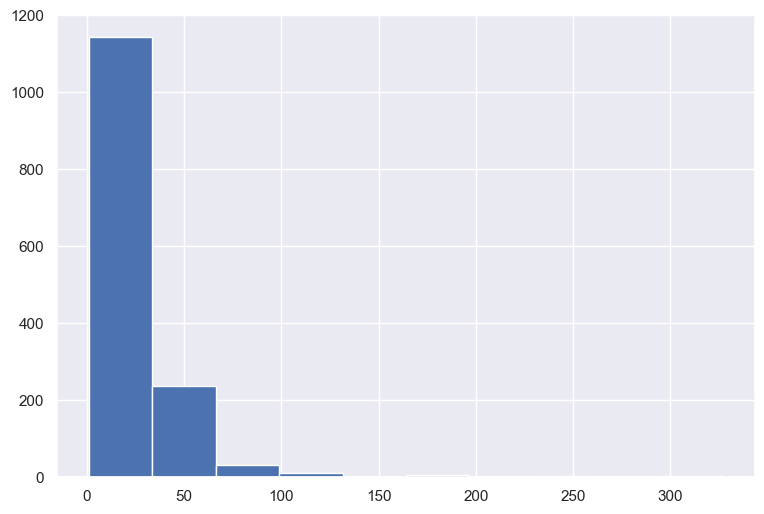

In [51]:
users_data[users_data.passed_course].day.hist()

Отберем из датасэта для каждого пользователя его первые n дней

In [52]:
user_min_time = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'min'}) \
    .rename({'timestamp': 'min_timestamp'}, axis=1)

In [53]:
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [54]:
users_data = users_data.merge(user_min_time, how='outer')

Неправильный метод (Очень долгий)

In [55]:
event_data_train = pd.DataFrame()

In [56]:
# for user_id in users_data.user_id:
#     min_user_time = users_data[users_data.user_id == user_id].min_timestamp.item()
#     time_threshold = min_user_time + 3 * 24 * 60 * 60
    
#     user_events_data = events_data[(events_data.user_id == user_id) & (events_data.timestamp < time_threshold)]
    
#     event_data_train = pd.concat([event_data_train, user_events_data])
# #     break

In [58]:
# user_events_data

Правильный метод

In [59]:
events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str)

In [60]:
learning_time_threshold = 3 * 24 * 60 * 60

In [61]:
user_learning_time_threshold = user_min_time.user_id.map(str) + '_' + (user_min_time.min_timestamp + learning_time_threshold).map(str)

In [62]:
user_min_time['user_learning_time_threshold'] = user_learning_time_threshold

In [63]:
events_data = events_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')

In [64]:
events_data.shape

(3480703, 8)

In [65]:
events_data.head(3)

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048


In [66]:
event_data_train = events_data[events_data.user_time <= events_data.user_learning_time_threshold]

In [67]:
event_data_train.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [69]:
event_data_train.groupby('user_id').day.nunique().max() 

# Всё правильно - затронуло 4 дня хоть и задано было 3 (3 суток затронули 4 дня)

4

Сделаем то же самое с submissions_data

In [70]:
submissions_data['users_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str)
submissions_data = submissions_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')
submissions_data_train = submissions_data[submissions_data.users_time <= submissions_data.user_learning_time_threshold]
submissions_data_train.groupby('user_id').day.nunique().max()

4

In [75]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index() \
    .rename(columns={'day': 'days'})

In [73]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index() \
    .rename(columns={'step_id': 'steps_tried'})

In [76]:
X = X.merge(steps_tried, on='user_id', how='outer')

In [77]:
X.head()

,user_id,days,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23


In [79]:
X = X.merge(submissions_data_train.pivot_table(index='user_id', 
                        columns='submission_status', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index())

In [81]:
X['correct_ratio'] = X.correct / (X.correct +  X.wrong)

In [84]:
X = X.merge(event_data_train.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index()[['user_id', 'viewed']], how='outer')

In [86]:
X.shape

(19234, 7)

In [87]:
X = X.fillna(0)

In [90]:
X = X.merge(users_data[['user_id', 'passed_course', 'is_gone_user']], how='outer')

In [93]:
X = X[~((X.is_gone_user == False) & (X.passed_course == False))]

In [94]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_course,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,8,1.0,11.0,9.0,21.0,0.30,154,False,True
3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,16,3.0,23.0,23.0,27.0,0.46,132,True,True


In [95]:
X.groupby(['passed_course', 'is_gone_user']).user_id.count()

passed_course  is_gone_user
False          True            16560
True           False             141
               True             1284
Name: user_id, dtype: int64

In [96]:
y = X.passed_course

In [97]:
X = X.drop(['passed_course', 'is_gone_user'], axis=1)

In [98]:
X = X.set_index(X.user_id)
X = X.drop('user_id', axis=1)

In [99]:
X.head()

,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,
2,1.0,2.0,2.0,0.0,1.00,9
3,1.0,4.0,4.0,4.0,0.50,20
8,1.0,11.0,9.0,21.0,0.30,154
14,1.0,1.0,0.0,1.0,0.00,9
16,3.0,23.0,23.0,27.0,0.46,132
